In [1]:
# To activate only if you're working with the git version, inside the repository (for developpers)
import sys
sys.path.insert(0, './src')
%load_ext autoreload
%autoreload 2

import logging
logging.getLogger().setLevel('INFO')

# Keras Video Generators

This package aims to produce generators that yields video frames from video dataset. It provides `VideoFrameGenerator`, `SlidingFrameGenerator` and `OpticalFlowGenerator`. The first one is the mother class.

This Notebook uses a subset of "HMDB: a large human motion database": https://serre-lab.clps.brown.edu/resource/hmdb-a-large-human-motion-database/

## Basics with VideoFrameGenerator

The first class is the simplest and probably the best to use if your dataset is large enough.

In [2]:
import keras_video

Using TensorFlow backend.


In [3]:
classes = ['dribble', 'golf']

Here, we will get create a generator for above given classes. As you can see, the `classname` pattern is represented as directory name.

In [4]:
gen = keras_video.VideoFrameGenerator(classes=classes, batch_size=4, nb_frames=5, glob_pattern='./_test/data/{classname}/*', split_val=.2)

class dribble, validation count: 29, train count: 116
class golf, validation count: 21, train count: 84
Total data: 2 classes for 200 files for train


You can use `transformation` parameter to give an `ImageGenerator` object that will randomly transform frames for each epoch.  

To check your generator, you can use `keras_video.utils` that gives `show_sample()` function to display (in a notebook) one batch.

In [5]:
from keras_video import utils as ku

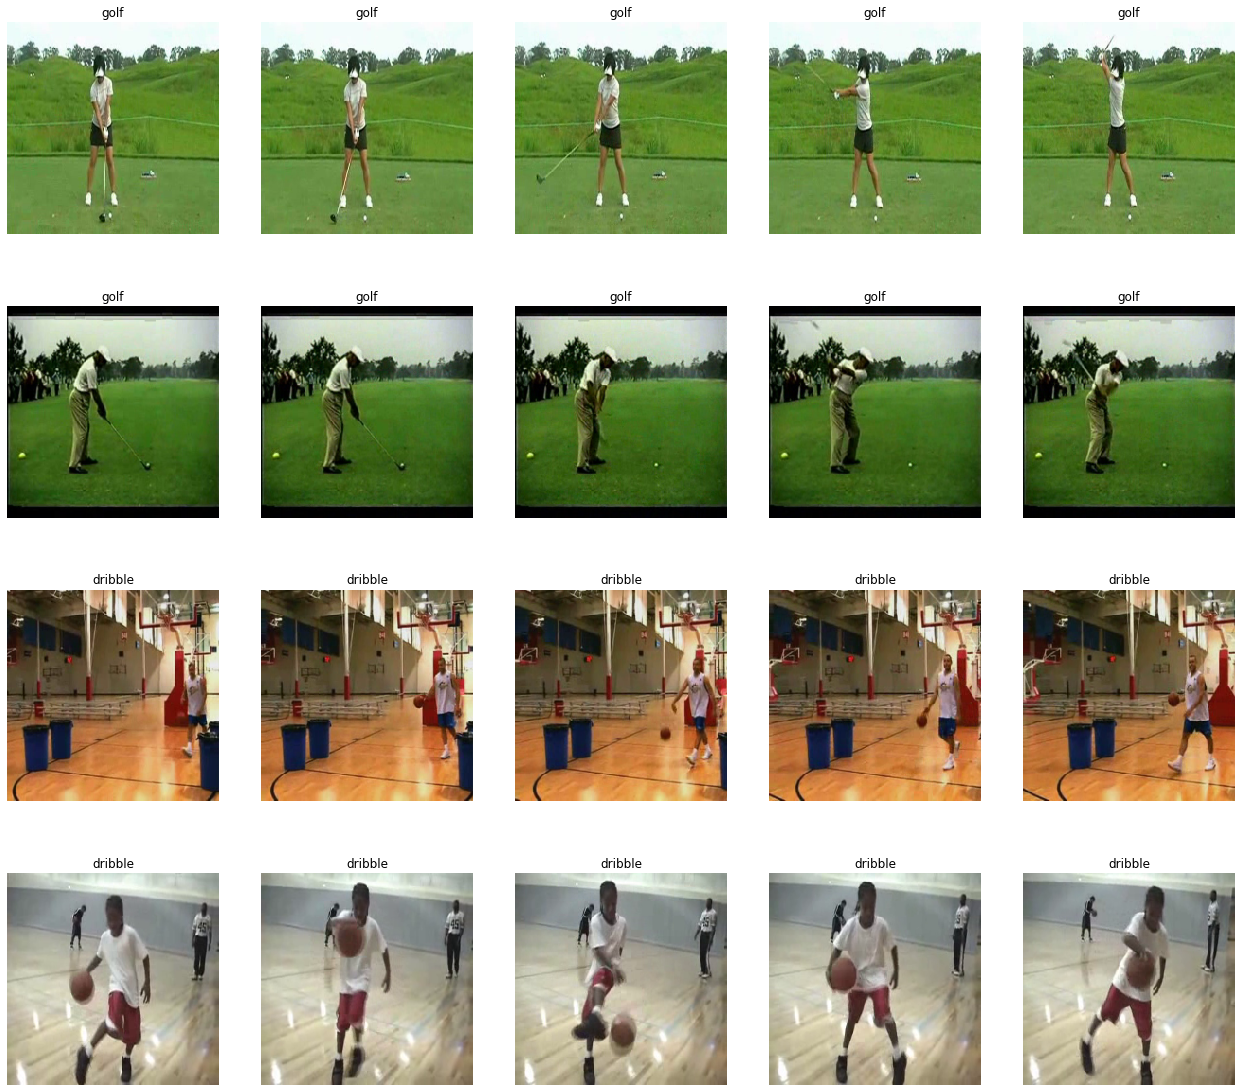

In [6]:
ku.show_sample(gen, random=True)

## SlidingFrameGenerator

This class allows the generation of more data. It takes frames from 0 to the $E_{nd} - N_{bframe}$ of video and produces sequence. Then it move the pointer to 1 and goes to $E_{end} - (N_{bframe - 1})$, and so on...

Giving `sequence_time` value activate the fact that a "movement" in the video should take maximum that time (in second) - by default, if that parameters is not set, so the generator considers to use the entire video as "one movement".

If `sequente_time` is set, the slinding pointer does this:

- get sequence frames $[0, E_{end}-N_{frames}$ whith $N_{frames}$ is the number of frame for the sequence time, following video FPS
- get N frames from that sequence
- then, for next sequence (frame 1): $[1, E_{end}-N_{frames}+1]$ and so on

That can be generalized to $Pos^{E_{end}}_{0} \rightarrow Frames[P_{os}, E_{end}-N_{frames} + P_{os}]$

The generator works exactly like `VideoFrameGenerator` afterward.



In [7]:
gen = keras_video.SlidingFrameGenerator(sequence_time=.5, classes=classes, batch_size=4, 
                                        nb_frames=5, glob_pattern='./_test/data/{classname}/*', 
                                        split_val=.2)

class dribble, validation count: 29, train count: 116
class golf, validation count: 21, train count: 84
Total data: 2 classes for 200 files for train
Checking files to find possible sequences, please wait...
For 200 files, I found 16436 possible sequence samples


In [8]:
print(len(gen))

4109


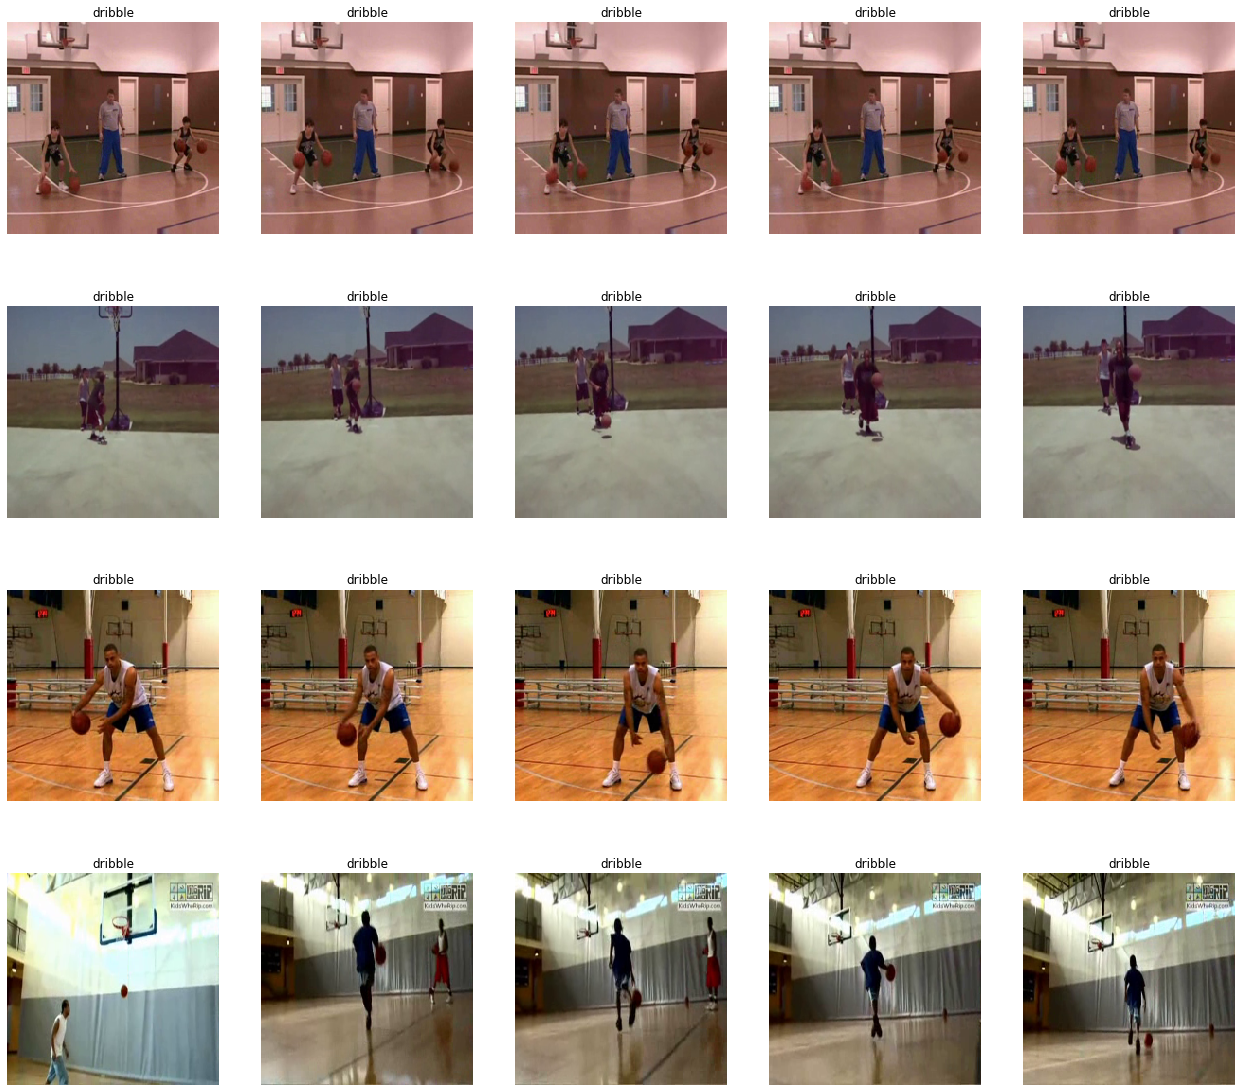

In [9]:
ku.show_sample(gen, random=True)

## OpticalFlow and Absolute Diff

We provide a easy to use OpticalFlow generator that takes $N+1$ frames to provides $N$ frames from videos.

There are 4 methods:
- `METHOD_ABS_DIFF` that applies a 
- `METHOD_DIFF_MASK`
- `METHOD_OPTICAL_FLOW` that uses Farneback Optical flow on frames
- `METHOD_FLOW_MASK` that makes the above transformation, but apply the result as a mask


In [10]:
gen = keras_video.OpticalFlowGenerator(method=keras_video.METHOD_FLOW_MASK, iterations=7,                  
    classes=classes, 
    batch_size=4, 
    nb_frames=5, 
    glob_pattern='./_test/data/{classname}/*', 
    split_val=.2)

class dribble, validation count: 29, train count: 116
class golf, validation count: 21, train count: 84
Total data: 2 classes for 200 files for train


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

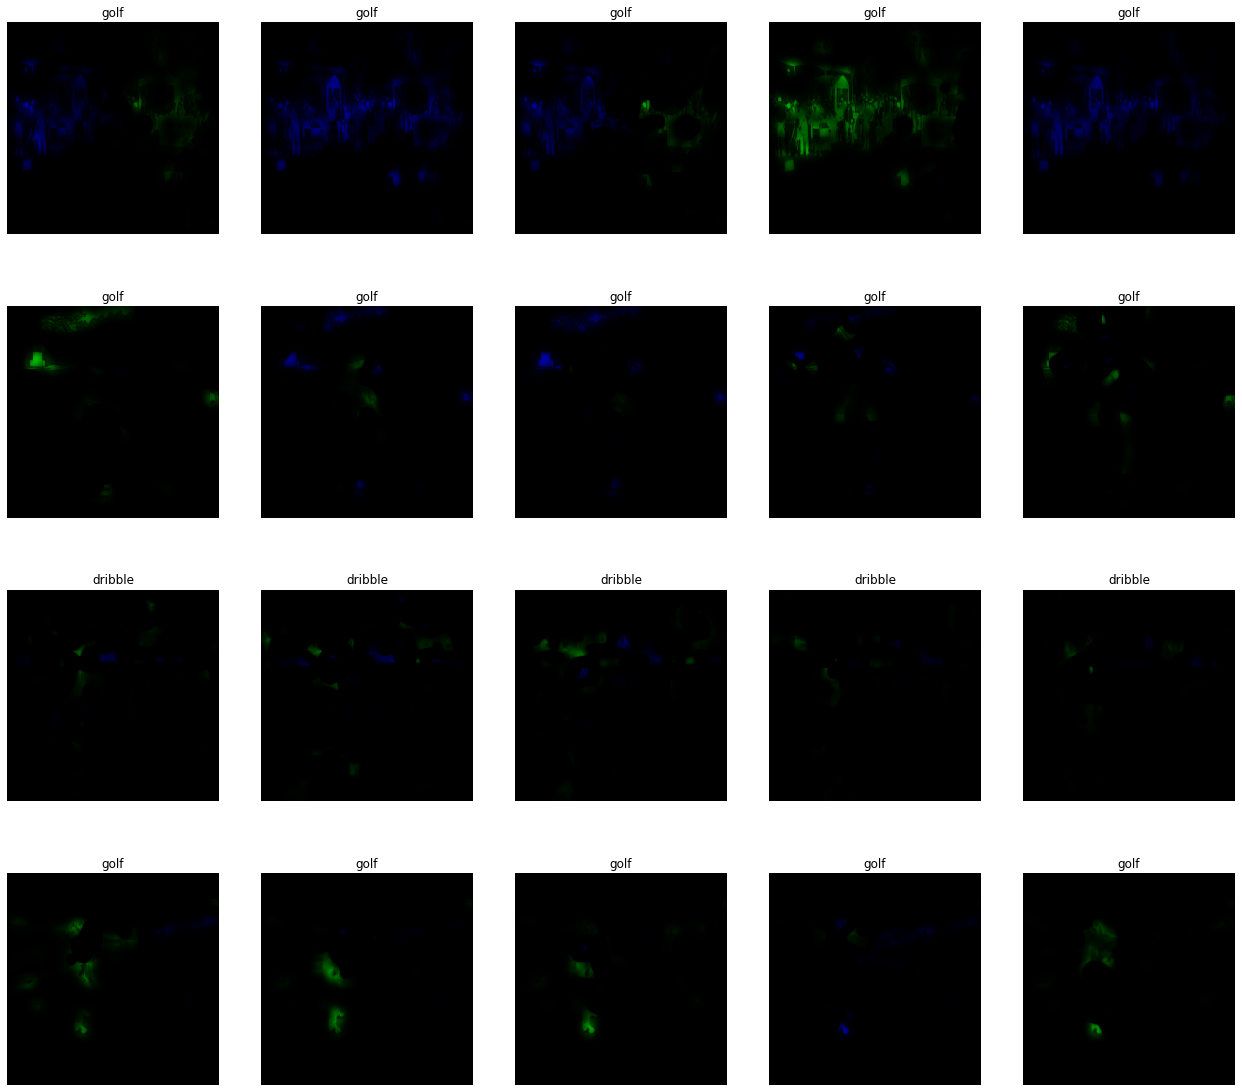

In [11]:
ku.show_sample(gen, random=True)